# GRIP: The Sparks Foundation

### Data Science and Business Analytics Intern

### Author: Shubham Prasad

## Task 5: Exploratory Data Analysis - Sports
###                   (Level - Advanced)
#### -> Perform 'Exploratory Data Analysis' on dataset 'Indian Premier League' .                
#### -> As a sports analyst, find out the most successful teams, players and factors contributing for win or loss of the team.
#### -> Suggest teams or players a company should endorse for its products.

## Step 1: Importing necessary libraries.

In [2]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(shiny)
library(plotly)
library(corrr)
library(treemap)
library(treemapify)
library(corrplot)


## Step 2: Reading the data from csv file.

In [3]:
matches <- read.csv("C:\\Users\\ADMIN\\OneDrive\\Desktop\\Internship Tasks\\matches.csv",stringsAsFactors = FALSE)
head(matches)
tail(matches)

deliveries <- read.csv("C:\\Users\\ADMIN\\OneDrive\\Desktop\\Internship Tasks\\deliveries.csv",stringsAsFactors = FALSE)
head(deliveries)
tail(deliveries)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,
2,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,
3,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,
4,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,
5,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,,,
6,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
751,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
752,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
753,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
754,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,,,
755,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
756,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,,,
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,,,
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,,,
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,,,
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,,,
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,,,


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,1,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,,,
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,,,
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,,,
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,,,
179078,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,


## Step 3: Finding out more about dataset.

In [4]:
summary(matches)
summary(deliveries)

       id              season         city               date          
 Min.   :    1.0   Min.   :2008   Length:756         Length:756        
 1st Qu.:  189.8   1st Qu.:2011   Class :character   Class :character  
 Median :  378.5   Median :2013   Mode  :character   Mode  :character  
 Mean   : 1792.2   Mean   :2013                                        
 3rd Qu.:  567.2   3rd Qu.:2016                                        
 Max.   :11415.0   Max.   :2019                                        
    team1              team2           toss_winner        toss_decision     
 Length:756         Length:756         Length:756         Length:756        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                  

    match_id         inning      batting_team       bowling_team      
 Min.   :    1   Min.   :1.000   Length:179078      Length:179078     
 1st Qu.:  190   1st Qu.:1.000   Class :character   Class :character  
 Median :  379   Median :1.000   Mode  :character   Mode  :character  
 Mean   : 1802   Mean   :1.483                                        
 3rd Qu.:  567   3rd Qu.:2.000                                        
 Max.   :11415   Max.   :5.000                                        
      over            ball         batsman          non_striker       
 Min.   : 1.00   Min.   :1.000   Length:179078      Length:179078     
 1st Qu.: 5.00   1st Qu.:2.000   Class :character   Class :character  
 Median :10.00   Median :4.000   Mode  :character   Mode  :character  
 Mean   :10.16   Mean   :3.616                                        
 3rd Qu.:15.00   3rd Qu.:5.000                                        
 Max.   :20.00   Max.   :9.000                                        
    bo

## Step 4 : Analysis and Visualization. 

### 1)Total matches played each Season. 


2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 
  58   57   60   73   74   76   60   59   60   59   60   60 

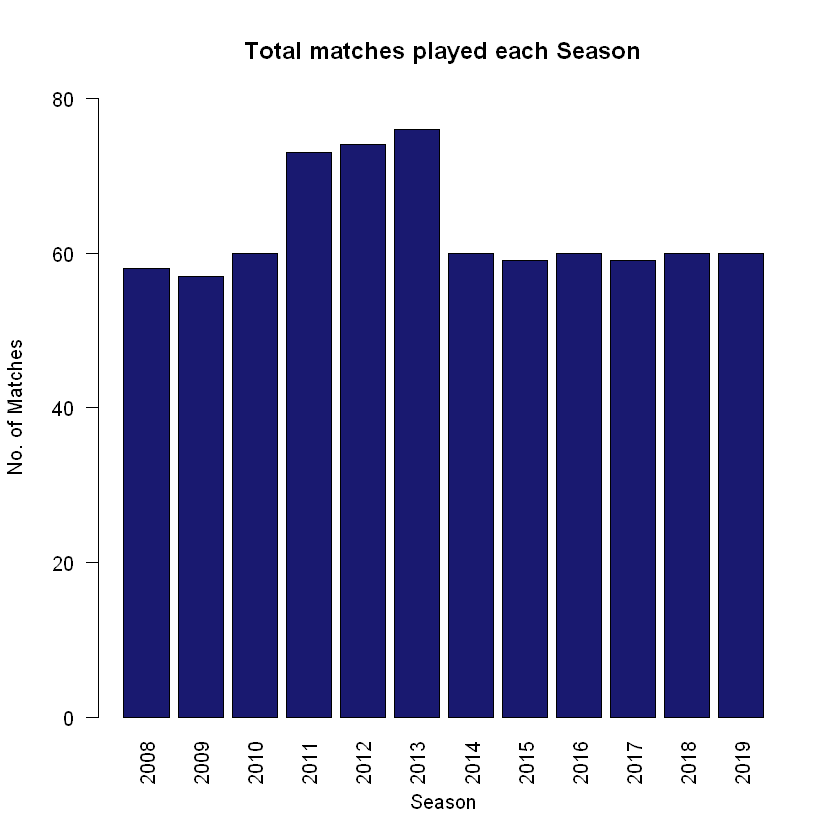

In [5]:
matches_per_season <- table(matches$season)
matches_per_season
barplot(matches_per_season,main = "Total matches played each Season", xlab = 'Season' , ylab = 'No. of Matches', col = 'midnightblue',las=2, ylim = c(0,80))

##### Observation : 2013 recorded the maximum number of IPL matches played, with the total being 76.

### 2) Venues with maximum number of matches played

venue,Total_matches
<chr>,<int>
Eden Gardens,77
M Chinnaswamy Stadium,73
Wankhede Stadium,73
Feroz Shah Kotla,67
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,47
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21


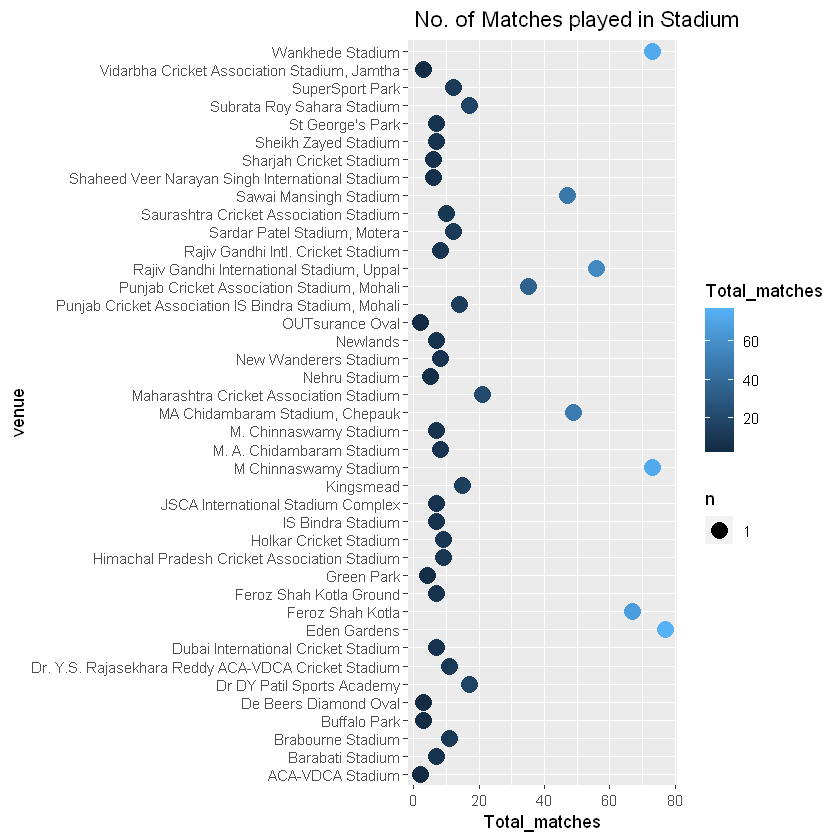

In [6]:
matches_by_venue = matches %>%
                   group_by(venue) %>%
                   summarize(Total_matches = n()) %>%
                   arrange(desc(Total_matches))
matches_by_venue

ggplot(matches_by_venue,aes(Total_matches, venue, colour = Total_matches)) + geom_count() + 
ggtitle(" No. of Matches played in Stadium")


#####  Observation: Most of the matches were played in Eden Gardens.

### 3) Teams with most wins.

winner,Total_wins
<chr>,<int>
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Rajasthan Royals,75
Delhi Daredevils,67
Sunrisers Hyderabad,58
Deccan Chargers,29


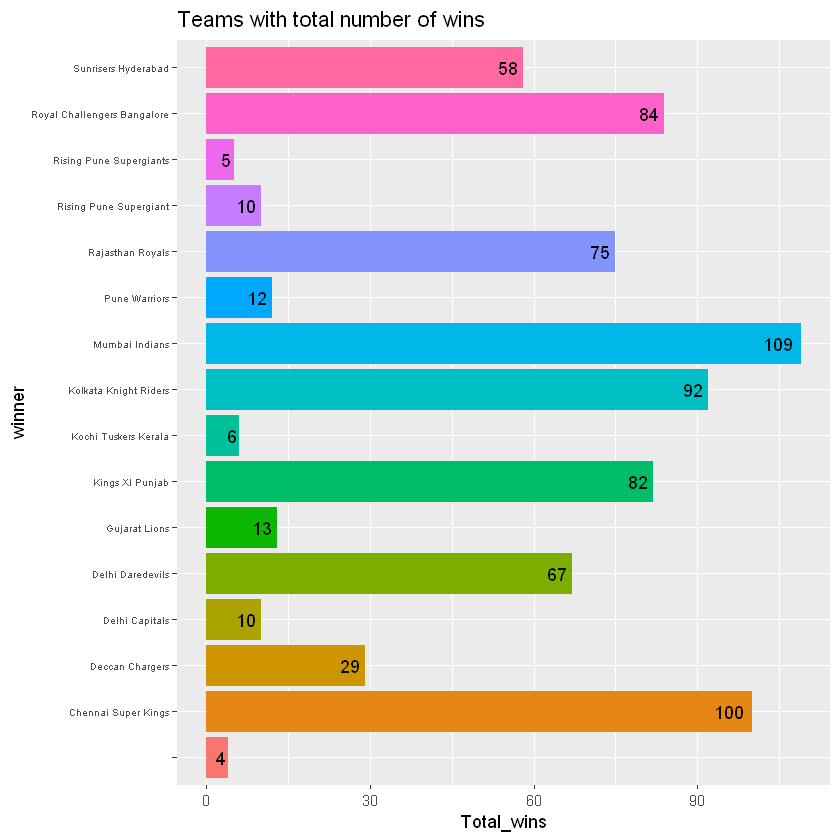

In [7]:
wins_by_team <- matches %>%
                group_by(winner) %>%
                summarize(Total_wins = n()) %>%
                arrange(desc(Total_wins))
wins_by_team

 ggplot(wins_by_team , aes(x=winner,y=Total_wins,fill=winner)) +
         geom_col()+
          ggtitle("Teams with total number of wins") + 
          coord_flip() + 
        theme(legend.position = "None", axis.text.y = element_text(size=6)) +
        geom_text(aes(label = Total_wins), hjust = 1.25)

##### Observation : Team with the highest number of wins is Mumbai Indians(109).

### 4) Teams won by maximum Runs.


winner,Total_runs
<chr>,<int>
Mumbai Indians,1866
Chennai Super Kings,1778
Royal Challengers Bangalore,1252
Kolkata Knight Riders,1086
Kings XI Punjab,925
Rajasthan Royals,895
Sunrisers Hyderabad,713
Delhi Daredevils,675
Deccan Chargers,421


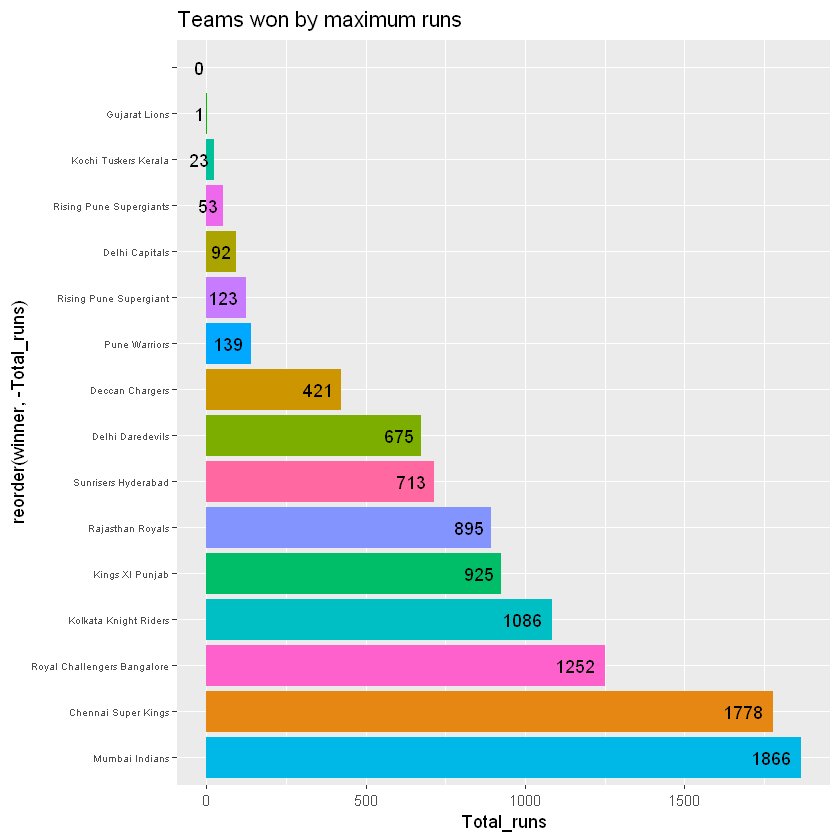

In [8]:
wins_by_max_runs <- matches %>% 
                select(winner, win_by_runs) %>%
                group_by(winner) %>%
                summarize(Total_runs = sum(win_by_runs)) %>%
                arrange(desc(Total_runs))
wins_by_max_runs

 ggplot(wins_by_max_runs , aes(x=reorder(winner,-Total_runs),y =Total_runs ,fill= winner)) +
         geom_col()+
          ggtitle("Teams won by maximum runs") + 
          coord_flip() + 
        theme(legend.position = "None", axis.text.y = element_text(size=6)) +
        geom_text(aes(label = Total_runs), hjust = 1.25)

### 5) Teams won by maximum wickets.

winner,Total_wickets
<chr>,<int>
Kolkata Knight Riders,351
Royal Challengers Bangalore,314
Mumbai Indians,307
Chennai Super Kings,289
Delhi Daredevils,275
Rajasthan Royals,273
Kings XI Punjab,268
Sunrisers Hyderabad,173
Deccan Chargers,72


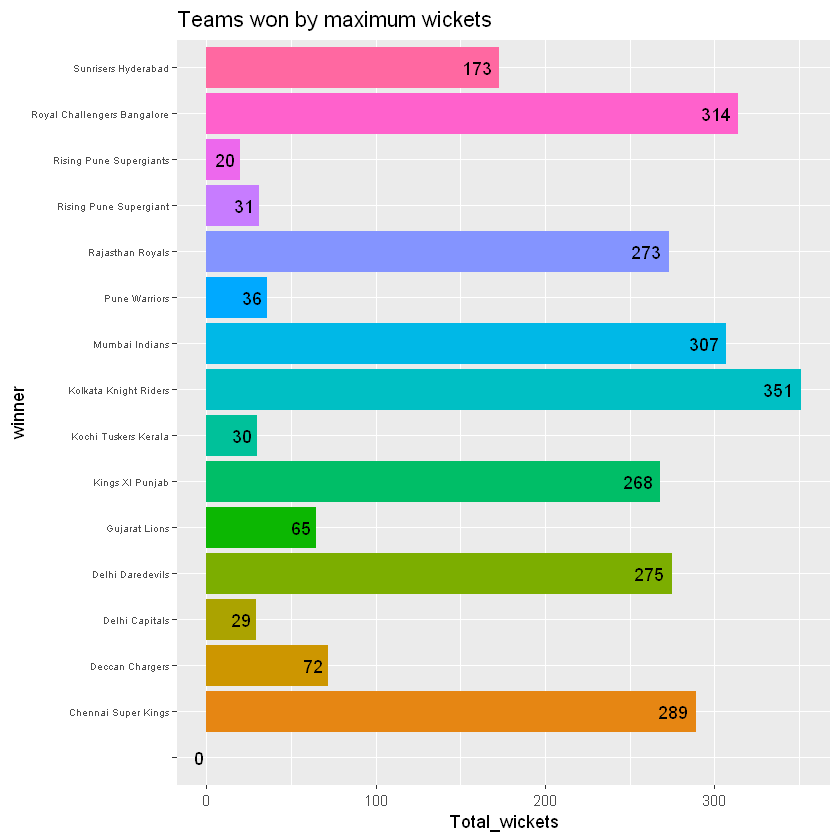

In [9]:
wins_by_max_wickets <- matches %>% 
                select(winner, win_by_wickets) %>%
                group_by(winner) %>%
                summarize(Total_wickets = sum(win_by_wickets)) %>%
                arrange(desc(Total_wickets))
wins_by_max_wickets

 ggplot(wins_by_max_wickets , aes(x=winner,y=Total_wickets ,fill= winner)) +
         geom_col()+
          ggtitle("Teams won by maximum wickets") + 
          coord_flip() + 
        theme(legend.position = "None", axis.text.y = element_text(size=6)) +
        geom_text(aes(label = Total_wickets), hjust = 1.25)

### 7) Batsman with maximum runs in each season

In [10]:
batsman_max_runs_per_season = deliveries %>%
                                left_join(matches , by = c("match_id"="id")) %>%
                                group_by(season , batsman) %>%
                                summarize(total_runs= n()) %>% 
                                arrange(season , desc(total_runs)) %>%
                                filter(total_runs == max(total_runs))
batsman_max_runs_per_season

`summarise()` has grouped output by 'season'. You can override using the `.groups` argument.



season,batsman,total_runs
<int>,<chr>,<int>
2008,SE Marsh,452
2009,ML Hayden,409
2010,JH Kallis,517
2011,SR Tendulkar,511
2012,CH Gayle,472
2013,MEK Hussey,580
2014,RV Uthappa,485
2015,LMP Simmons,455
2016,V Kohli,655


### 8) Batsmen with maximum runs throughout given IPL data. 

In [11]:
batsman_with_most_runs <- deliveries %>% 
                select(batsman, batsman_runs) %>%
                group_by(batsman) %>%
                summarize(Total_runs = sum(batsman_runs)) %>%
                arrange(desc(Total_runs))
batsman_with_most_runs



batsman,Total_runs
<chr>,<int>
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


### 9) Bowlers with highest number of wickets in each season. 

In [12]:
bowler_max_wickets_per_season = deliveries %>%
                                left_join(matches , by = c("match_id"="id")) %>%
                                filter(dismissal_kind != "run out") %>%
                                group_by(season , bowler) %>%
                                summarize(wickets = n()) %>% 
                                arrange(season , desc(wickets)) %>%
                                filter(wickets == max(wickets))
bowler_max_wickets_per_season

`summarise()` has grouped output by 'season'. You can override using the `.groups` argument.



season,bowler,wickets
<int>,<chr>,<int>
2008,MS Gony,370
2009,RP Singh,379
2010,A Kumble,387
2011,SL Malinga,395
2012,R Ashwin,397
2013,Harbhajan Singh,429
2014,AR Patel,401
2015,A Nehra,382
2016,B Kumar,413


### 10)  Bowlers with maximum wickets throughout given IPL data.

In [13]:
bowlers_with_most_wickets <- deliveries %>%
                             filter(dismissal_kind != "run out") %>%
                                group_by( bowler) %>%
                                summarize(wickets = n()) %>% 
                                arrange( desc(wickets))
                                
bowlers_with_most_wickets 

bowler,wickets
<chr>,<int>
Harbhajan Singh,3440
A Mishra,3163
PP Chawla,3150
R Ashwin,3003
SL Malinga,2956
B Kumar,2699
DJ Bravo,2690
P Kumar,2625
UT Yadav,2588


###   11) Has toss winning helped in winning matches?

[1] "Yes,Toss-winning has an impact of winning a game"
[1] "Matches won by toss winners are: 393 & Total matches: 756"


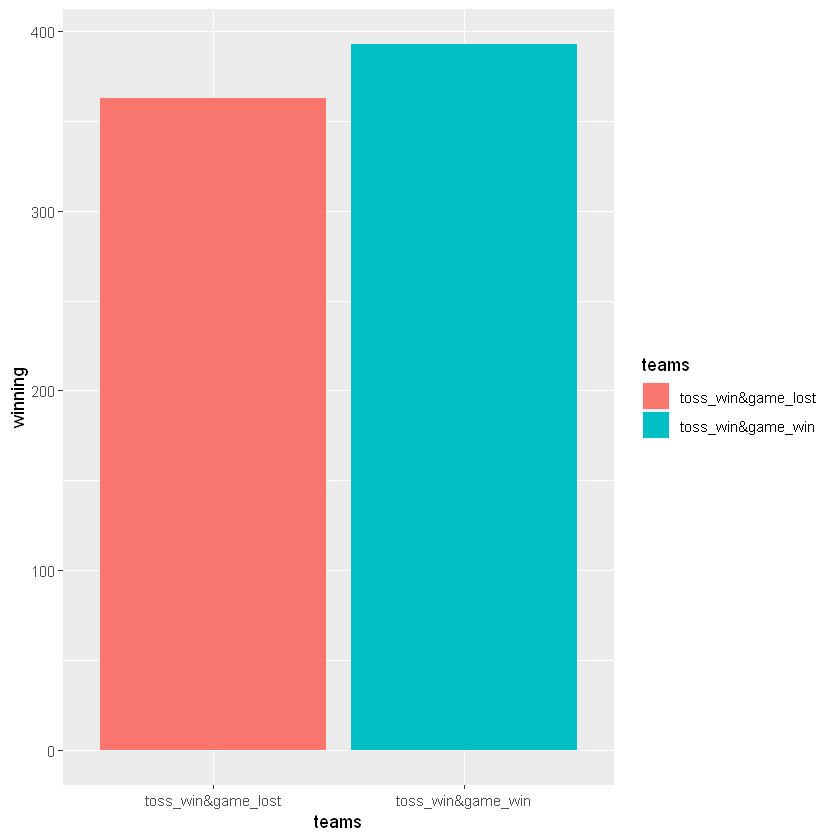

In [14]:
#Ho: Toss winning has an impact on winning the game.
y=0
n=0

for(i in seq(1, nrow(matches)))
{
  if(matches$toss_winner[i] == matches$winner[i])
    y=y+1
  else
    n=n+1
}
if(y>= n)
{
  print(paste("Yes,Toss-winning has an impact of winning a game"))
  print(paste("Matches won by toss winners are:",y, "& Total matches:", nrow(matches)))
}
winning = c(y,n)
teams = c("toss_win&game_win", "toss_win&game_lost")
df = data.frame(teams,winning,stringsAsFactors = FALSE)

ggplot(df)+geom_bar(aes(teams,winning,fill=teams),stat = "identity")

##### Observation : Our null-hypothesis is correct. Toss-winning does have an impact on winning a game.

### 12) Batting first has helped to win the match?

In [15]:
# Ho: Batting first helps to win the match.

toss=matches[matches$toss_decision=="bat",]
bf=0
bl=0
i=0
for(i in seq(1,nrow(toss)))
{
  if(as.factor(toss$toss_winner[i]==as.character(toss$winner[i])))
  {
    bf=bf+1
  }
  else
  {
    bl=bl+1
  }
}

toss1=matches[matches$toss_decision=="field",]
fw=0
fl=0
j=0
for(j in seq(1,nrow(toss1)))
{
  if(as.factor(toss1$toss_winner[j]==as.character(toss1$winner[j])))
  {
    fw=fw+1
  }
  else
  {
    fl=fl+1
  }
}
toss_decision = data.frame("Bat first or second"=c("Batting first","Fielding first"),"count"=c(bf,fw))
tibble(toss_decision)

Bat.first.or.second,count
<fct>,<dbl>
Batting first,293
Fielding first,463


##### Observation :Null-hypothesis stated above is rejected. Opting batting first does not help in winning the game. 

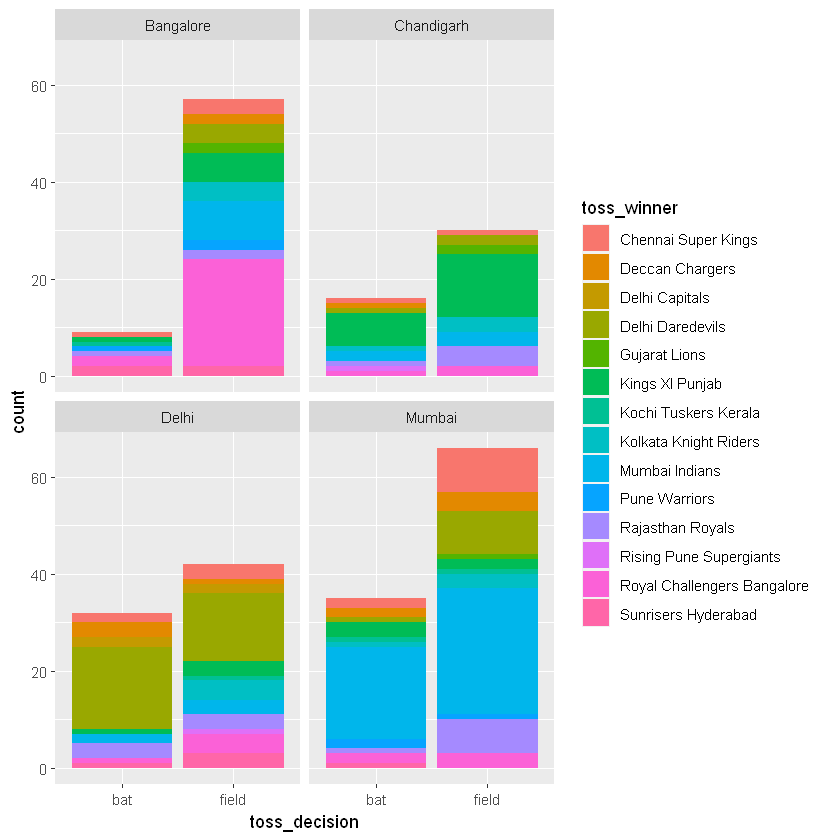

In [16]:
matches%>%filter(city=="Mumbai"|city=="Bangalore"|city=="Delhi"|city=="kolkata"|city=="jaipur"|city=="Hydrabad"|city=="Chandigarh"|city=="pune")%>% ggplot()+
  geom_bar(aes(x=toss_decision,fill=toss_winner))+facet_wrap(~city)

### 13)  Winners of IPL by each year/season.

In [17]:
matches %>%
  select(season, id, winner)%>%
  group_by(season)%>%
  slice(which.max(id))%>%
  select(season,winner)

season,winner
<int>,<chr>
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad


##### Observation : Highest number of IPL title is won by Mumbai Indians. 

### 14) Best stadiums to win by a large margin of runs 

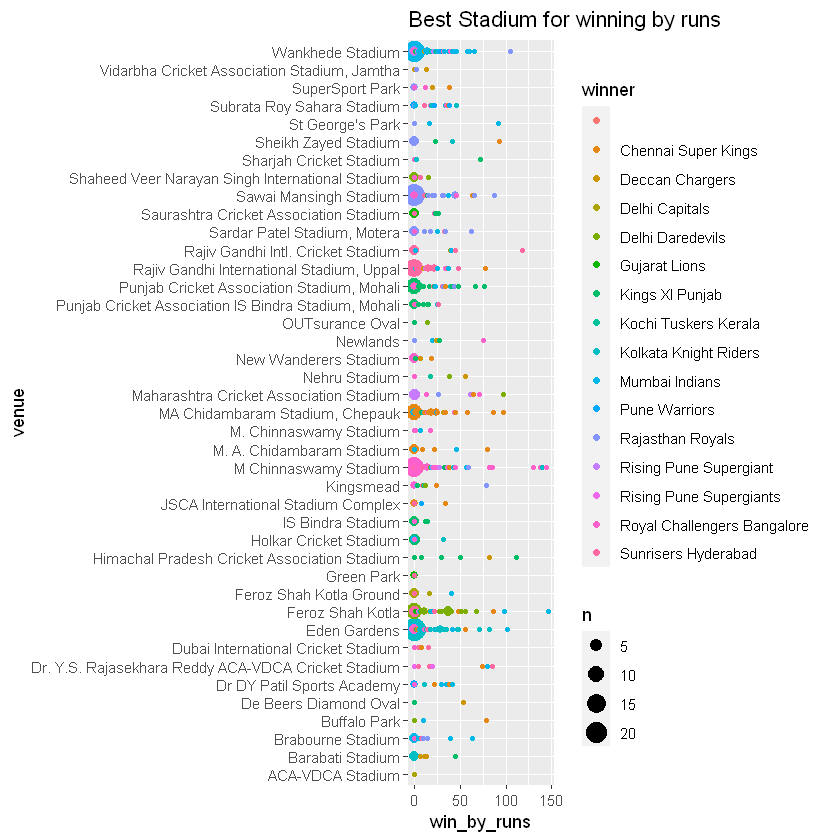

In [18]:
ggplot(matches,aes(win_by_runs, venue, colour = winner)) + geom_count() + 
ggtitle("Best Stadium for winning by runs")


### 15) Best Defending Team 

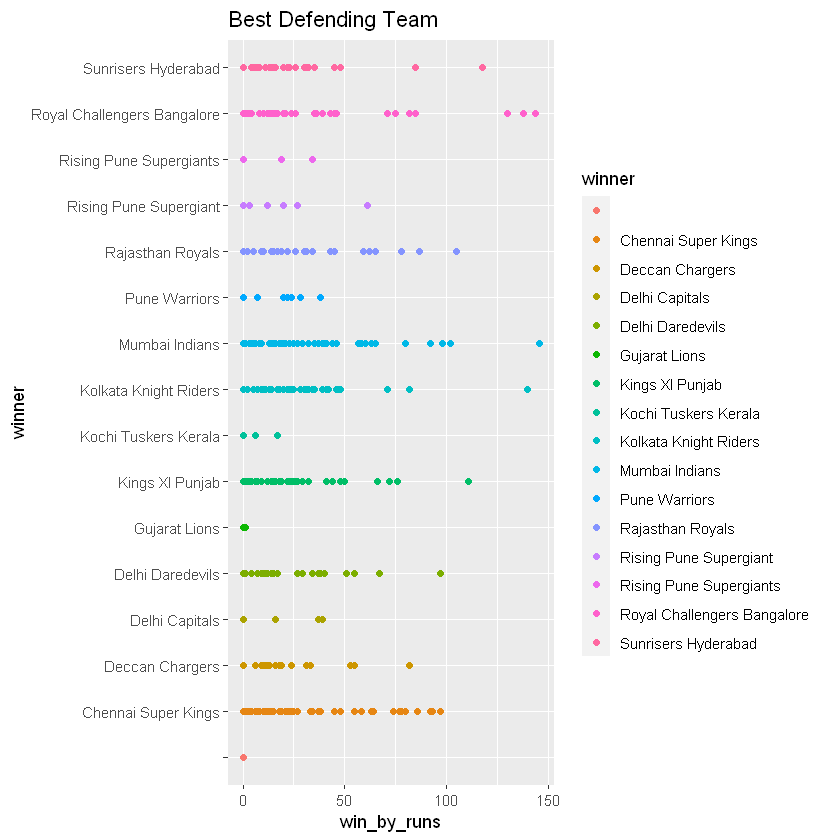

In [19]:
ggplot(matches,aes(win_by_runs, winner, colour = winner)) + geom_point() + 
ggtitle("Best Defending Team") 

### 16) Batsmen with highest number of 6's

Selecting by sixes



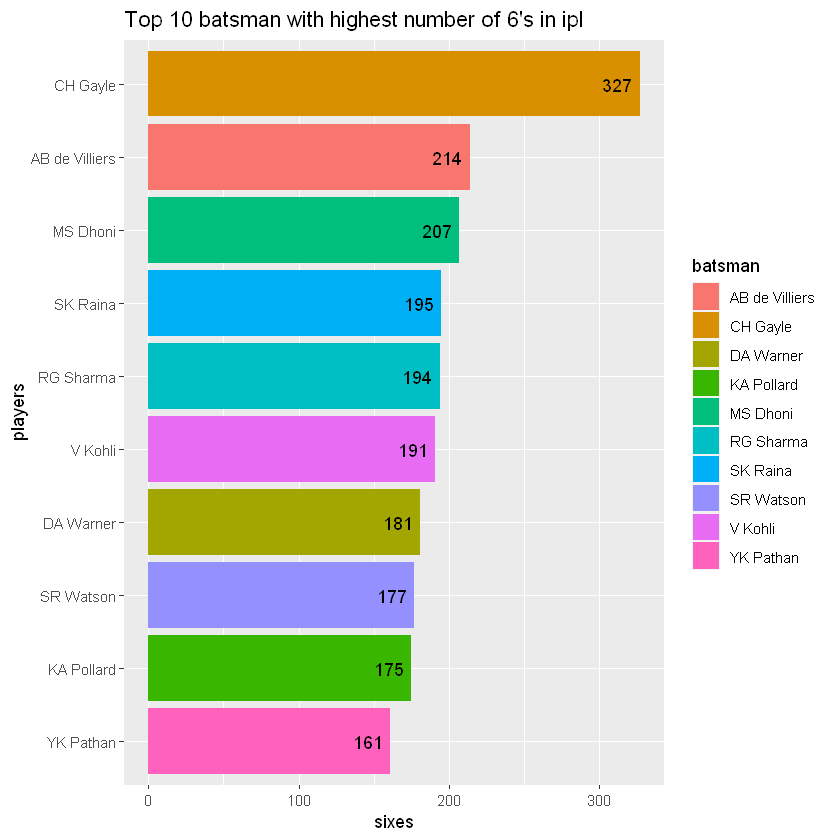

In [20]:
deliveries %>% 
  group_by(batsman) %>%
  filter(batsman_runs == 6) %>%
  dplyr:: summarize(sixes = n()) %>%
  top_n(10) %>%
  ggplot(aes(x = reorder(batsman, sixes), y = sixes, fill= batsman))+
  geom_bar(stat = "identity")+
  coord_flip()+
  xlab("players")+
  ggtitle("Top 10 batsman with highest number of 6's in ipl")+
geom_text(aes(label = sixes), hjust = 1.25)

### 17) Number of time players got awarded man of the match.

Selecting by awards



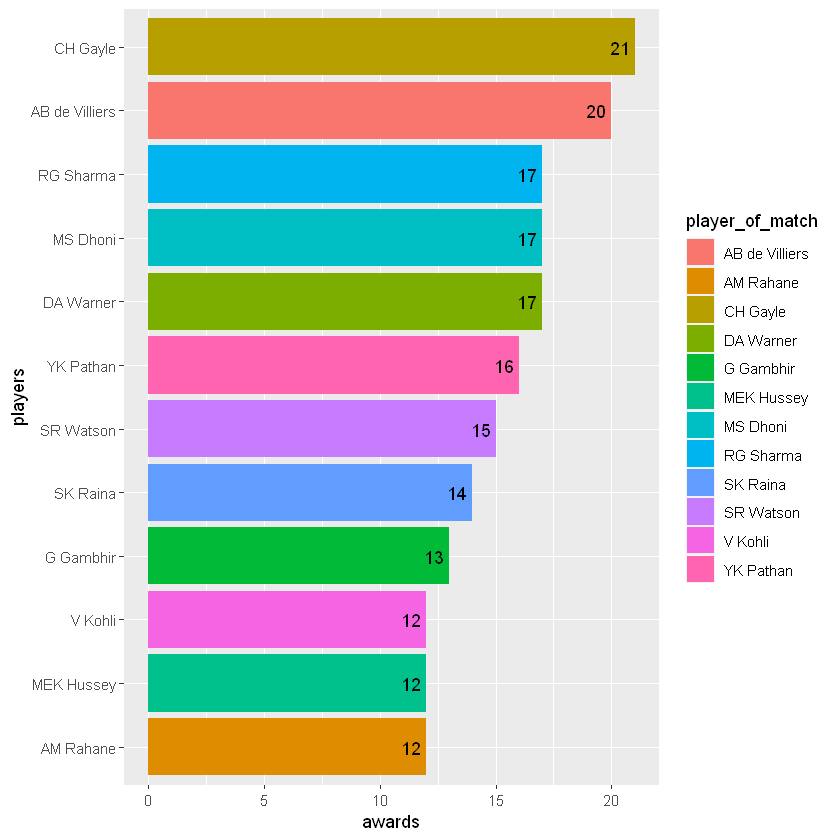

In [21]:
matches%>%
  group_by(player_of_match)%>%
  dplyr::summarise(awards =n())%>%
  top_n(10)%>%
  ggplot(aes(x = reorder(player_of_match, awards), y = awards ,fill= player_of_match))+
  geom_bar(stat = "identity")+
  coord_flip()+
  xlab("players") +
  geom_text(aes(label = awards), hjust = 1.25)

## Step 5: Conclusion
### 1) Most successful teams and players
####      -> The most successful team is Mumbai Indians with 4 IPL wins and 109 wins overall, followed by Chennai Super Kings and Kolkata Knight Riders. 
####      -> The player with most player of the match award is CH Gayle(21), followed by AB de Villers(20) and RG sharma, MS Dhoni, DA Warner with 17 awards.

### 2) Factors contributing to win/loss
####     ->Toss winning has an impact on winning the match.
####     ->For some teams, stadiums(venue) for the match also played an important role in winning the game.

### 3) Suggest teams or players a company should endorse for its products.
####     ->The teams that should be considered for endorsement are Mumbai Indians,  Chennai Super Kings and Kolkata Knight Riders. 
####     ->The players that should be considered for endorsement are CH Gayle, AB de Villiers, Virat Kohli, Rohit Sharma, MS Dhoni, Harbhajan Singh, Amit Mishra, D Chahar, Rashid Khan and Jaspreet Bumrah.